# Day 77 - Data Transformation Techniques

## Objective

Explore data transformation techniques in ETL (Extract, Transform, Load) processes using Python. This lesson covers the fundamental transformation operations, algorithmic approaches, and practical implementations that are essential for preparing data for analysis and machine learning workflows.

## Prerequisites

- Intermediate Python, Pandas, and NumPy skills
- Understanding of data structures and basic data manipulation
- Familiarity with basic SQL concepts is helpful but not required

## Introduction to Data Transformation

Data transformation is the **T** in ETL (Extract, Transform, Load) - a critical phase where raw data is converted into a format suitable for analysis, reporting, or machine learning. While extraction gets the data from sources and loading puts it into destinations, transformation is where the real value is created.

### Why Data Transformation Matters

In real-world scenarios, data rarely arrives in a perfect state. It may come from multiple sources with different formats, contain inconsistencies, have missing values, or require aggregations and calculations. Data transformation addresses these challenges by:

1. **Standardizing formats** - Converting data types, date formats, and units of measurement
2. **Cleaning data** - Handling missing values, removing duplicates, fixing inconsistencies
3. **Enriching data** - Adding calculated fields, deriving new features, merging datasets
4. **Aggregating data** - Summarizing detailed records into meaningful metrics
5. **Reshaping data** - Pivoting, unpivoting, and restructuring for analysis

### Common Transformation Operations

The most frequently used transformation operations include:

- **Filtering**: Selecting specific rows based on conditions
- **Mapping**: Applying functions to transform values
- **Aggregation**: Computing summary statistics (sum, mean, count, etc.)
- **Joining**: Combining data from multiple sources
- **Sorting**: Ordering data by one or more columns
- **Type conversion**: Changing data types appropriately
- **String operations**: Parsing, formatting, and cleaning text data
- **Date/time manipulation**: Extracting components, calculating durations

## Mathematical and Algorithmic Foundations

### 1. Aggregation Operations

Aggregation functions reduce multiple values to a single summary value:

**Mean (Average)**: $\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$
- Where $x_i$ represents individual values and $n$ is the count

**Weighted Average**: $\bar{x}_w = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i}$
- Where $w_i$ represents weights for each value

**Standard Deviation**: $\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2}$
- Measures the dispersion of data points

### 2. String Distance and Matching

For fuzzy matching and deduplication:

**Levenshtein Distance**: The minimum number of single-character edits (insertions, deletions, substitutions) needed to change one string into another.

**Similarity Score**: $similarity = 1 - \frac{distance}{max(len(s_1), len(s_2))}$

### 3. Normalization and Scaling

**Min-Max Normalization**: $x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$
- Scales values to range [0, 1]

**Z-Score Standardization**: $z = \frac{x - \mu}{\sigma}$
- Transforms to mean=0, std=1

### 4. Join Operations Complexity

Different join types have different algorithmic complexities:

- **Hash Join**: $O(n + m)$ - Efficient for large datasets
- **Sort-Merge Join**: $O(n\log n + m\log m)$ - Good when data is pre-sorted
- **Nested Loop Join**: $O(n \times m)$ - Simple but can be slow for large datasets

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.4


## Creating Sample Data for Transformation Examples

Let's create realistic sample datasets that simulate common data scenarios you'll encounter in ETL pipelines.

In [2]:
# Create a sample sales dataset
np.random.seed(42)

# Generate dates
dates = pd.date_range(start='2024-01-01', end='2024-06-30', freq='D')
n_records = 500

# Generate sample data
sales_data = pd.DataFrame({
    'transaction_id': range(1, n_records + 1),
    'date': np.random.choice(dates, n_records),
    'product': np.random.choice(['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Headphones'], n_records),
    'quantity': np.random.randint(1, 10, n_records),
    'unit_price': np.random.uniform(10, 1000, n_records).round(2),
    'customer_id': np.random.randint(1000, 2000, n_records),
    'region': np.random.choice(['North', 'South', 'East', 'West'], n_records),
    'payment_method': np.random.choice(['Credit Card', 'Debit Card', 'PayPal', 'Cash'], n_records)
})

# Add some missing values to make it realistic
sales_data.loc[np.random.choice(sales_data.index, 20), 'region'] = np.nan
sales_data.loc[np.random.choice(sales_data.index, 10), 'payment_method'] = np.nan

print("Sales Dataset:")
print(sales_data.head(10))
print(f"\nDataset shape: {sales_data.shape}")
print(f"\nData types:\n{sales_data.dtypes}")
print(f"\nMissing values:\n{sales_data.isnull().sum()}")

Sales Dataset:
   transaction_id       date     product  quantity  unit_price  customer_id  \
0               1 2024-04-12       Mouse         1       67.34         1901   
1               2 2024-06-28    Keyboard         4       83.95         1024   
2               3 2024-04-02     Monitor         7      853.89         1652   
3               4 2024-01-15  Headphones         4      990.25         1116   
4               5 2024-04-16  Headphones         6      679.29         1481   
5               6 2024-03-12     Monitor         9      451.50         1391   
6               7 2024-01-21       Mouse         1      651.10         1916   
7               8 2024-04-12  Headphones         5      598.45         1993   
8               9 2024-05-01    Keyboard         7      389.78         1963   
9              10 2024-03-15       Mouse         1       74.97         1536   

  region payment_method  
0   East           Cash  
1  North     Debit Card  
2   East         PayPal  
3  North   

## 1. Filtering Transformations

Filtering selects rows that meet specific criteria. This is one of the most common transformation operations.

In [3]:
# Example 1: Simple filtering
high_value_sales = sales_data[sales_data['unit_price'] > 500]

print("High-value sales (unit_price > 500):")
print(high_value_sales.head())
print(f"\nTotal high-value transactions: {len(high_value_sales)}")

# Example 2: Multiple conditions with logical operators
premium_sales = sales_data[
    (sales_data['unit_price'] > 500) &
    (sales_data['quantity'] >= 3) &
    (sales_data['region'] == 'North')
]

print(f"\nPremium sales (high price AND high quantity in North region): {len(premium_sales)}")

# Example 3: Using isin() for multiple values
laptop_monitor_sales = sales_data[sales_data['product'].isin(['Laptop', 'Monitor'])]
print(f"\nLaptop and Monitor sales: {len(laptop_monitor_sales)}")

# Example 4: Filtering with string methods
credit_payments = sales_data[sales_data['payment_method'].str.contains('Card', na=False)]
print(f"\nCard payments: {len(credit_payments)}")

High-value sales (unit_price > 500):
   transaction_id       date     product  quantity  unit_price  customer_id  \
2               3 2024-04-02     Monitor         7      853.89         1652   
3               4 2024-01-15  Headphones         4      990.25         1116   
4               5 2024-04-16  Headphones         6      679.29         1481   
6               7 2024-01-21       Mouse         1      651.10         1916   
7               8 2024-04-12  Headphones         5      598.45         1993   

  region payment_method  
2   East         PayPal  
3  North         PayPal  
4  South     Debit Card  
6   West     Debit Card  
7  North         PayPal  

Total high-value transactions: 260

Premium sales (high price AND high quantity in North region): 44

Laptop and Monitor sales: 195

Card payments: 249


## 2. Mapping and Applying Functions

Mapping transforms values by applying a function to each element. This is essential for deriving new features and cleaning data.

In [4]:
# Calculate total sales amount
sales_data['total_amount'] = sales_data['quantity'] * sales_data['unit_price']

# Example 1: Categorize sales using apply
def categorize_sale(amount):
    if amount < 100:
        return 'Small'
    elif amount < 500:
        return 'Medium'
    else:
        return 'Large'

sales_data['sale_category'] = sales_data['total_amount'].apply(categorize_sale)

print("Sales with categories:")
print(sales_data[['transaction_id', 'total_amount', 'sale_category']].head(10))

# Example 2: Using lambda functions
sales_data['discounted_price'] = sales_data['unit_price'].apply(lambda x: x * 0.9 if x > 500 else x)

print("\nPrice comparison (original vs discounted):")
comparison = sales_data[sales_data['unit_price'] > 500][['product', 'unit_price', 'discounted_price']].head()
print(comparison)

# Example 3: Map for simple replacements
region_codes = {'North': 'N', 'South': 'S', 'East': 'E', 'West': 'W'}
sales_data['region_code'] = sales_data['region'].map(region_codes)

print("\nRegion codes:")
print(sales_data[['region', 'region_code']].dropna().head())

Sales with categories:
   transaction_id  total_amount sale_category
0               1         67.34         Small
1               2        335.80        Medium
2               3       5977.23         Large
3               4       3961.00         Large
4               5       4075.74         Large
5               6       4063.50         Large
6               7        651.10         Large
7               8       2992.25         Large
8               9       2728.46         Large
9              10         74.97         Small

Price comparison (original vs discounted):
      product  unit_price  discounted_price
2     Monitor      853.89           768.501
3  Headphones      990.25           891.225
4  Headphones      679.29           611.361
6       Mouse      651.10           585.990
7  Headphones      598.45           538.605

Region codes:
  region region_code
0   East           E
1  North           N
2   East           E
3  North           N
4  South           S


## 3. Aggregation Transformations

Aggregation combines multiple rows into summary statistics. This is crucial for reporting and analysis.

In [5]:
# Example 1: Simple aggregations
print("Overall Statistics:")
print(f"Total Revenue: ${sales_data['total_amount'].sum():,.2f}")
print(f"Average Transaction: ${sales_data['total_amount'].mean():,.2f}")
print(f"Total Transactions: {len(sales_data):,}")
print(f"Total Quantity Sold: {sales_data['quantity'].sum():,}")

# Example 2: Group by operations
product_summary = sales_data.groupby('product').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'quantity': 'sum'
}).round(2)

product_summary.columns = ['Total_Revenue', 'Avg_Transaction', 'Num_Transactions', 'Total_Quantity']
product_summary = product_summary.sort_values('Total_Revenue', ascending=False)

print("\nProduct Performance Summary:")
print(product_summary)

# Example 3: Multiple grouping columns
regional_product_summary = sales_data.groupby(['region', 'product']).agg({
    'total_amount': 'sum',
    'transaction_id': 'count'
}).round(2)

regional_product_summary.columns = ['Total_Revenue', 'Transaction_Count']
regional_product_summary = regional_product_summary.sort_values('Total_Revenue', ascending=False)

print("\nTop Regional-Product Combinations:")
print(regional_product_summary.head(10))

Overall Statistics:
Total Revenue: $1,250,386.67
Average Transaction: $2,500.77
Total Transactions: 500
Total Quantity Sold: 2,494

Product Performance Summary:
            Total_Revenue  Avg_Transaction  Num_Transactions  Total_Quantity
product                                                                     
Laptop          301492.90          2844.27               106             560
Headphones      283162.37          2551.01               111             581
Mouse           229678.83          2343.66                98             470
Keyboard        226134.30          2355.57                96             473
Monitor         209918.27          2358.63                89             410

Top Regional-Product Combinations:
                   Total_Revenue  Transaction_Count
region product                                     
South  Laptop           92087.53                 30
East   Headphones       78854.28                 32
West   Headphones       68515.68                 29
Sout

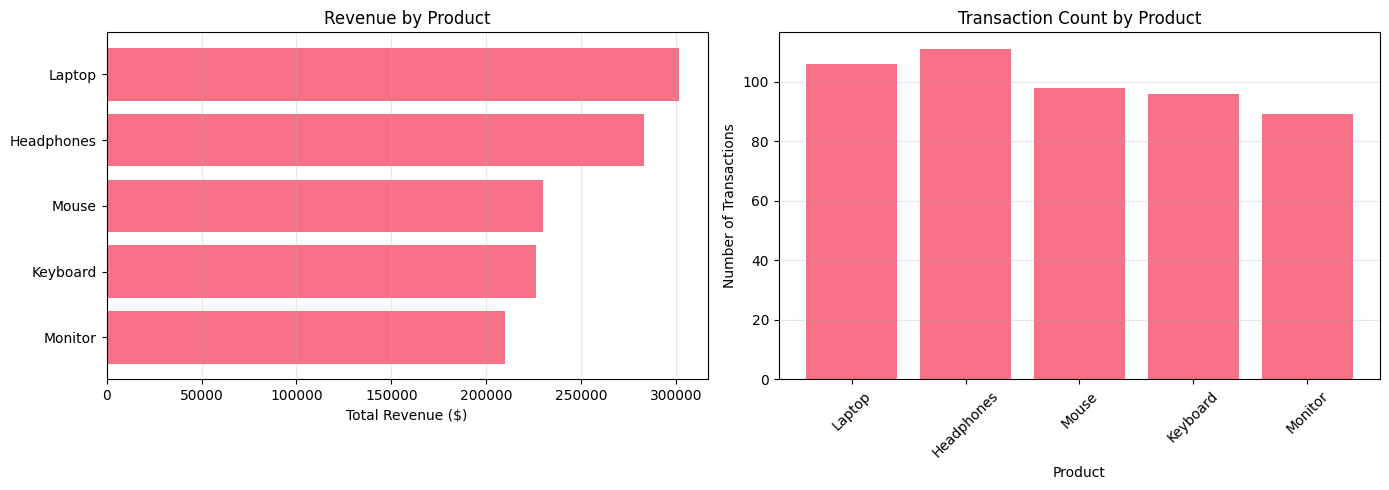

Visualization complete!


In [6]:
# Visualize product performance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Revenue by product
product_summary_sorted = product_summary.sort_values('Total_Revenue')
axes[0].barh(product_summary_sorted.index, product_summary_sorted['Total_Revenue'])
axes[0].set_xlabel('Total Revenue ($)')
axes[0].set_title('Revenue by Product')
axes[0].grid(axis='x', alpha=0.3)

# Transaction count by product
axes[1].bar(product_summary.index, product_summary['Num_Transactions'])
axes[1].set_xlabel('Product')
axes[1].set_ylabel('Number of Transactions')
axes[1].set_title('Transaction Count by Product')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Visualization complete!")

## 4. Joining and Merging Data

Joining combines data from multiple sources - a fundamental operation in ETL pipelines.

In [7]:
# Create a customer demographics dataset
customer_data = pd.DataFrame({
    'customer_id': range(1000, 2000),
    'customer_name': [f'Customer_{i}' for i in range(1000, 2000)],
    'age': np.random.randint(18, 70, 1000),
    'segment': np.random.choice(['Premium', 'Standard', 'Basic'], 1000),
    'loyalty_years': np.random.randint(0, 10, 1000)
})

print("Customer Data:")
print(customer_data.head())

# Example 1: Inner join - only matching records
sales_with_customer = sales_data.merge(
    customer_data,
    on='customer_id',
    how='inner'
)

print(f"\nSales with customer info (inner join): {len(sales_with_customer)} records")
print(sales_with_customer[['transaction_id', 'customer_name', 'segment', 'total_amount']].head())

# Example 2: Analyze by customer segment
segment_analysis = sales_with_customer.groupby('segment').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'customer_id': 'nunique'
}).round(2)

segment_analysis.columns = ['Total_Revenue', 'Avg_Transaction', 'Num_Transactions', 'Unique_Customers']

print("\nPerformance by Customer Segment:")
print(segment_analysis)

Customer Data:
   customer_id  customer_name  age   segment  loyalty_years
0         1000  Customer_1000   41     Basic              5
1         1001  Customer_1001   36   Premium              8
2         1002  Customer_1002   54     Basic              1
3         1003  Customer_1003   56  Standard              2
4         1004  Customer_1004   38  Standard              9

Sales with customer info (inner join): 500 records
   transaction_id  customer_name   segment  total_amount
0               1  Customer_1901   Premium         67.34
1               2  Customer_1024  Standard        335.80
2               3  Customer_1652  Standard       5977.23
3               4  Customer_1116   Premium       3961.00
4               5  Customer_1481   Premium       4075.74

Performance by Customer Segment:
          Total_Revenue  Avg_Transaction  Num_Transactions  Unique_Customers
segment                                                                     
Basic         455579.04          2633.40   

## 5. Data Type Transformations

Converting data types is essential for proper analysis and memory optimization.

In [8]:
# Example 1: Convert date strings to datetime
print("Before conversion:")
print(f"Date dtype: {sales_data['date'].dtype}")

# Ensure date is datetime type
sales_data['date'] = pd.to_datetime(sales_data['date'])

print(f"\nAfter conversion:")
print(f"Date dtype: {sales_data['date'].dtype}")

# Example 2: Extract date components
sales_data['year'] = sales_data['date'].dt.year
sales_data['month'] = sales_data['date'].dt.month
sales_data['month_name'] = sales_data['date'].dt.month_name()
sales_data['day_of_week'] = sales_data['date'].dt.day_name()
sales_data['quarter'] = sales_data['date'].dt.quarter

print("\nExtracted date components:")
print(sales_data[['date', 'year', 'month', 'month_name', 'day_of_week', 'quarter']].head())

# Example 3: Categorical conversion for memory efficiency
print(f"\nMemory before categorical conversion: {sales_data['product'].memory_usage(deep=True)} bytes")

sales_data['product'] = sales_data['product'].astype('category')
sales_data['region'] = sales_data['region'].astype('category')

print(f"Memory after categorical conversion: {sales_data['product'].memory_usage(deep=True)} bytes")

Before conversion:
Date dtype: datetime64[ns]

After conversion:
Date dtype: datetime64[ns]

Extracted date components:
        date  year  month month_name day_of_week  quarter
0 2024-04-12  2024      4      April      Friday        2
1 2024-06-28  2024      6       June      Friday        2
2 2024-04-02  2024      4      April     Tuesday        2
3 2024-01-15  2024      1    January      Monday        1
4 2024-04-16  2024      4      April     Tuesday        2

Memory before categorical conversion: 32259 bytes
Memory after categorical conversion: 1125 bytes


Monthly Sales Performance:
            Total_Revenue  Transaction_Count
month_name                                  
January         235405.45                 80
February        214570.86                 87
March           152526.84                 67
April           212696.66                 91
May             242581.60                101
June            192605.26                 74


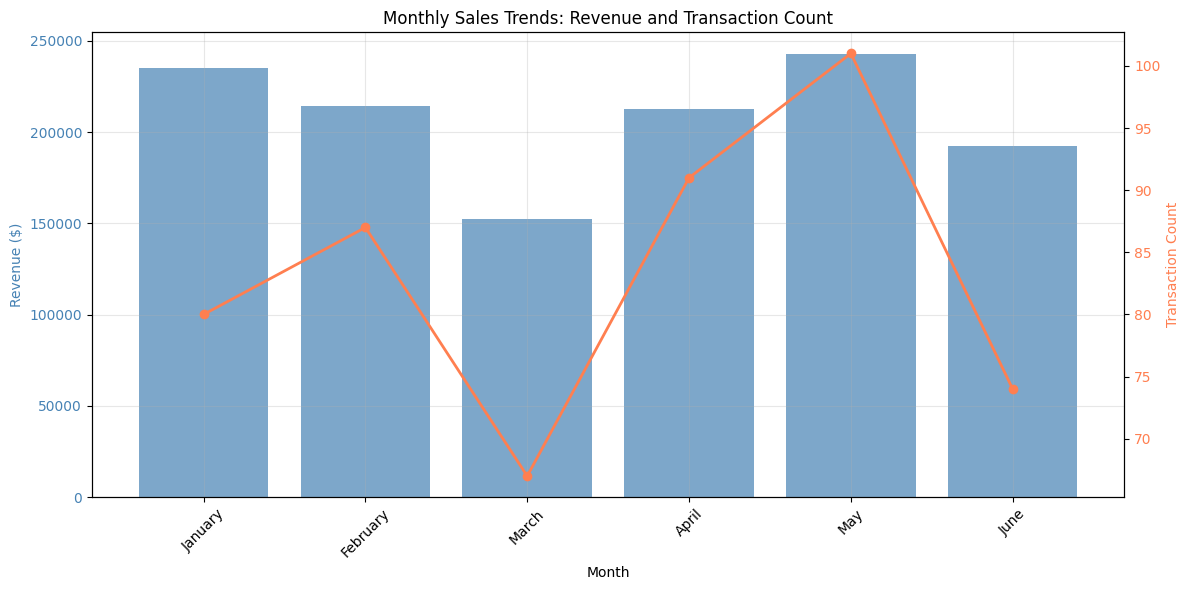

In [9]:
# Time-based analysis
monthly_sales = sales_data.groupby('month_name').agg({
    'total_amount': 'sum',
    'transaction_id': 'count'
}).round(2)

monthly_sales.columns = ['Total_Revenue', 'Transaction_Count']

# Order by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
monthly_sales = monthly_sales.reindex(month_order)

print("Monthly Sales Performance:")
print(monthly_sales)

# Visualize monthly trends
fig, ax1 = plt.subplots(figsize=(12, 6))

x = range(len(monthly_sales))
ax1.bar(x, monthly_sales['Total_Revenue'], alpha=0.7, label='Revenue', color='steelblue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Revenue ($)', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticks(x)
ax1.set_xticklabels(monthly_sales.index, rotation=45)

ax2 = ax1.twinx()
ax2.plot(x, monthly_sales['Transaction_Count'], color='coral', marker='o', linewidth=2, label='Transactions')
ax2.set_ylabel('Transaction Count', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

plt.title('Monthly Sales Trends: Revenue and Transaction Count')
ax1.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 6. String Transformations

String operations are crucial for cleaning and standardizing text data.

In [10]:
# Create sample data with messy strings
messy_customer_data = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'name': ['  John Doe  ', 'JANE SMITH', 'bob johnson', 'Alice  Brown', 'charlie DAVIS'],
    'email': ['john@email.com', 'JANE@EMAIL.COM', 'bob@email.com', 'alice@email.com', 'charlie@email.com'],
    'phone': ['(555) 123-4567', '555-234-5678', '5553456789', '555.456.7890', '555 567 8901']
})

print("Original messy data:")
print(messy_customer_data)

# Example 1: String cleaning
messy_customer_data['name_clean'] = (messy_customer_data['name']
    .str.strip()  # Remove leading/trailing whitespace
    .str.title()  # Title case
)

messy_customer_data['email_clean'] = messy_customer_data['email'].str.lower()

print("\nCleaned data:")
print(messy_customer_data[['name', 'name_clean', 'email', 'email_clean']])

# Example 2: Extract and standardize phone numbers
messy_customer_data['phone_digits'] = messy_customer_data['phone'].str.replace(r'\D', '', regex=True)

print("\nStandardized phone numbers:")
print(messy_customer_data[['phone', 'phone_digits']])

# Example 3: String splitting
sales_data['product_upper'] = sales_data['product'].str.upper()
sales_data['product_length'] = sales_data['product'].astype(str).str.len()

print("\nString transformations:")
print(sales_data[['product', 'product_upper', 'product_length']].head())

Original messy data:
   customer_id           name              email           phone
0            1     John Doe       john@email.com  (555) 123-4567
1            2     JANE SMITH     JANE@EMAIL.COM    555-234-5678
2            3    bob johnson      bob@email.com      5553456789
3            4   Alice  Brown    alice@email.com    555.456.7890
4            5  charlie DAVIS  charlie@email.com    555 567 8901

Cleaned data:
            name     name_clean              email        email_clean
0     John Doe         John Doe     john@email.com     john@email.com
1     JANE SMITH     Jane Smith     JANE@EMAIL.COM     jane@email.com
2    bob johnson    Bob Johnson      bob@email.com      bob@email.com
3   Alice  Brown   Alice  Brown    alice@email.com    alice@email.com
4  charlie DAVIS  Charlie Davis  charlie@email.com  charlie@email.com

Standardized phone numbers:
            phone phone_digits
0  (555) 123-4567   5551234567
1    555-234-5678   5552345678
2      5553456789   5553456789
3

## 7. Pivoting and Reshaping Data

Reshaping data is essential for different analysis and visualization needs.

Revenue by Product and Region:
region          East     North     South      West
product                                           
Headphones  78854.28  52954.95  67594.98  68515.68
Keyboard    42073.76  67071.99  63380.18  42781.15
Laptop      64307.48  65835.24  92087.53  67455.75
Monitor     56529.17  54685.94  32511.49  52994.28
Mouse       38991.74  53624.05  68012.60  66732.80

Revenue by Product and Payment Method:
payment_method       Cash  Credit Card  Debit Card     PayPal       Total
product                                                                  
Headphones       68354.05     68358.92    66210.33   80239.07   283162.37
Keyboard         66284.86     61762.33    42371.13   48615.37   219033.69
Laptop           69652.33     98167.38    75550.60   53988.19   297358.50
Monitor          49289.43     52198.06    52875.03   55555.75   209918.27
Mouse            52132.73     70557.74    49104.18   47703.81   219498.46
Total           305713.40    351044.43   286111.27  28

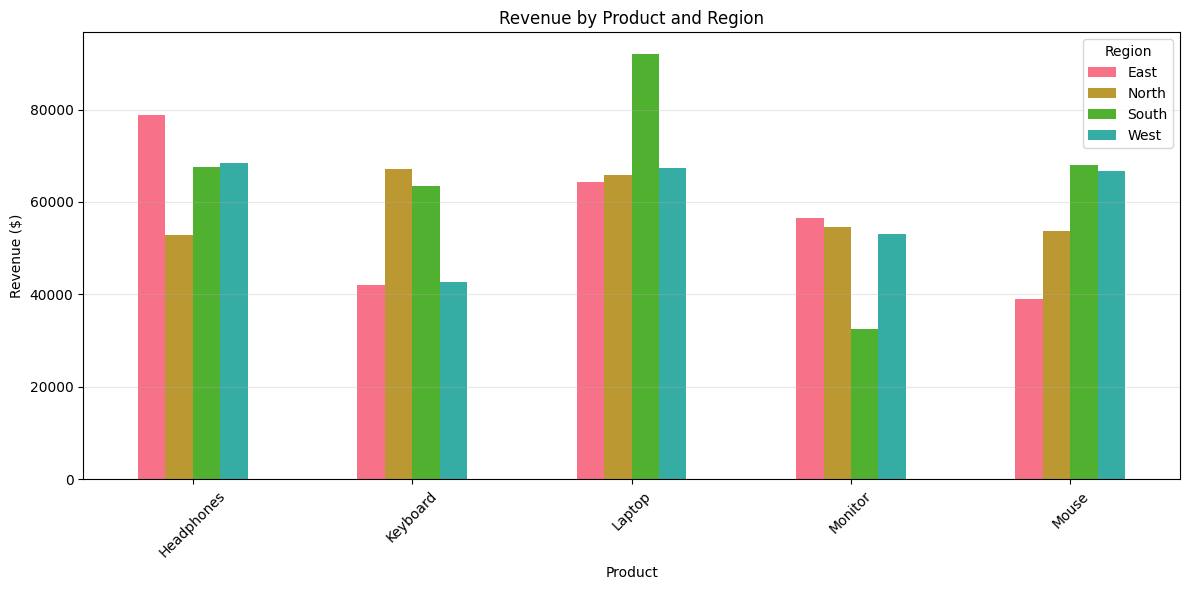

In [11]:
# Example 1: Pivot table
pivot_data = sales_data.pivot_table(
    values='total_amount',
    index='product',
    columns='region',
    aggfunc='sum',
    fill_value=0
).round(2)

print("Revenue by Product and Region:")
print(pivot_data)

# Example 2: Cross-tabulation
crosstab = pd.crosstab(
    sales_data['product'],
    sales_data['payment_method'],
    values=sales_data['total_amount'],
    aggfunc='sum',
    margins=True,
    margins_name='Total'
).round(2).fillna(0)

print("\nRevenue by Product and Payment Method:")
print(crosstab)

# Visualize the pivot data
pivot_data.plot(kind='bar', figsize=(12, 6))
plt.title('Revenue by Product and Region')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Handling Missing Data

Missing data is common in real-world datasets and requires careful handling.

In [12]:
# Check missing data
print("Missing data summary:")
missing_summary = pd.DataFrame({
    'Column': sales_data.columns,
    'Missing_Count': sales_data.isnull().sum(),
    'Missing_Percent': (sales_data.isnull().sum() / len(sales_data) * 100).round(2)
})
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0]
print(missing_summary)

# Example 1: Fill with mode (most common value)
sales_data['region_filled'] = sales_data['region'].fillna(sales_data['region'].mode()[0])
sales_data['payment_method_filled'] = sales_data['payment_method'].fillna(sales_data['payment_method'].mode()[0])

print(f"\nRegion missing before: {sales_data['region'].isnull().sum()}")
print(f"Region missing after: {sales_data['region_filled'].isnull().sum()}")

# Example 2: Forward fill for time series
time_series_df = sales_data.sort_values('date').copy()
time_series_df['region_ffill'] = time_series_df['region'].fillna(method='ffill')

print("\nForward fill example:")
print(time_series_df[time_series_df['region'].isnull()][['date', 'region', 'region_ffill']].head())

# Example 3: Drop rows with missing values (when appropriate)
clean_sales = sales_data.dropna(subset=['region', 'payment_method'])
print(f"\nRecords before dropping missing: {len(sales_data)}")
print(f"Records after dropping missing: {len(clean_sales)}")

Missing data summary:
                        Column  Missing_Count  Missing_Percent
region                  region             20              4.0
payment_method  payment_method             10              2.0
region_code        region_code             20              4.0

Region missing before: 20
Region missing after: 0

Forward fill example:
          date region region_ffill
482 2024-01-02    NaN         West
323 2024-01-06    NaN         West
91  2024-01-09    NaN         West
496 2024-01-12    NaN         East
110 2024-02-02    NaN        North

Records before dropping missing: 500
Records after dropping missing: 471


## 9. Window Functions and Rolling Calculations

Window functions perform calculations across sets of rows related to the current row.

Cumulative revenue by product:
          date     product  total_amount  cumulative_revenue
122 2024-01-01       Mouse        972.18              972.18
476 2024-01-01    Keyboard        544.34              544.34
438 2024-01-01  Headphones         89.76               89.76
18  2024-01-02    Keyboard        889.36             1433.70
193 2024-01-02  Headphones       3555.18             3644.94
482 2024-01-02      Laptop        659.58              659.58
247 2024-01-02     Monitor        683.04              683.04
64  2024-01-02     Monitor       1632.96             2316.00
219 2024-01-03       Mouse        263.10             1235.28
167 2024-01-03     Monitor       2037.14             4353.14

Rolling calculations:
        date  total_amount  rolling_7day_avg  rolling_7day_sum
0 2024-01-01       1606.28           1606.28           1606.28
1 2024-01-02       7420.12           4513.20           9026.40
2 2024-01-03       2300.24           3775.55          11326.64
3 2024-01-04       9400

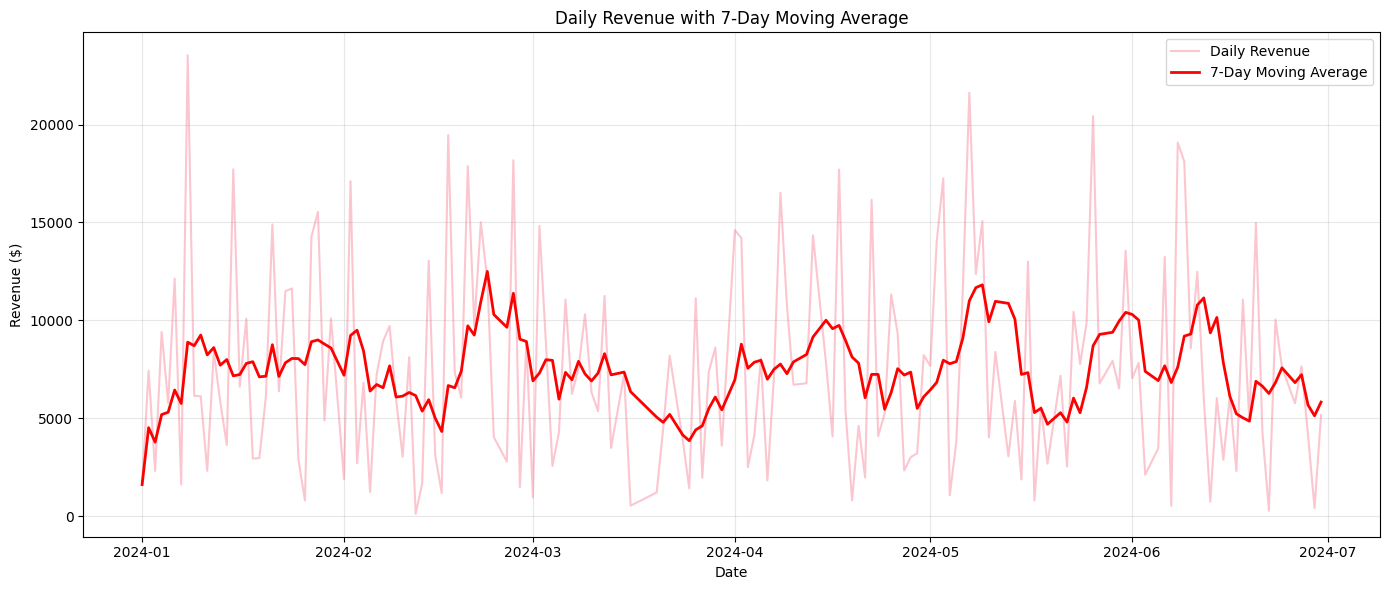


Top transactions by product:
        product  total_amount  revenue_rank
150  Headphones       8650.53           1.0
307  Headphones       8567.64           2.0
113  Headphones       7583.04           3.0
70     Keyboard       8860.59           1.0
341    Keyboard       8792.64           2.0
107    Keyboard       7178.08           3.0
255      Laptop       7830.72           1.0
31       Laptop       7283.44           2.0
375      Laptop       6920.91           3.0
431     Monitor       8658.45           1.0
323     Monitor       6284.25           2.0
345     Monitor       6025.74           3.0
102       Mouse       7409.07           1.0
21        Mouse       6621.28           2.0
233       Mouse       6201.99           3.0


In [13]:
# Sort by date for time-based calculations
time_series = sales_data.sort_values('date').copy()

# Example 1: Cumulative sum
time_series['cumulative_revenue'] = time_series.groupby('product')['total_amount'].cumsum()

print("Cumulative revenue by product:")
print(time_series[['date', 'product', 'total_amount', 'cumulative_revenue']].head(10))

# Example 2: Rolling average (7-day moving average)
daily_sales = time_series.groupby('date').agg({
    'total_amount': 'sum'
}).reset_index()

daily_sales['rolling_7day_avg'] = daily_sales['total_amount'].rolling(window=7, min_periods=1).mean().round(2)
daily_sales['rolling_7day_sum'] = daily_sales['total_amount'].rolling(window=7, min_periods=1).sum().round(2)

print("\nRolling calculations:")
print(daily_sales.head(10))

# Visualize rolling average
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['date'], daily_sales['total_amount'], alpha=0.4, label='Daily Revenue')
plt.plot(daily_sales['date'], daily_sales['rolling_7day_avg'], linewidth=2, label='7-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.title('Daily Revenue with 7-Day Moving Average')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Example 3: Ranking
sales_data['revenue_rank'] = sales_data.groupby('product')['total_amount'].rank(ascending=False, method='dense')

print("\nTop transactions by product:")
top_by_product = sales_data[sales_data['revenue_rank'] <= 3].sort_values(['product', 'revenue_rank'])
print(top_by_product[['product', 'total_amount', 'revenue_rank']].head(15))

## 10. Building a Complete Transformation Pipeline

Let's combine multiple transformation techniques into a comprehensive pipeline.

In [14]:
# Create a complete transformation pipeline
def transform_sales_data(df):
    '''
    Complete ETL transformation pipeline for sales data
    '''
    # 1. Data cleaning
    df_clean = df.copy()

    # Fill missing values
    df_clean['region'] = df_clean['region'].fillna(df_clean['region'].mode()[0])
    df_clean['payment_method'] = df_clean['payment_method'].fillna('Unknown')

    # 2. Feature engineering
    df_clean['total_amount'] = df_clean['quantity'] * df_clean['unit_price']
    df_clean['year'] = df_clean['date'].dt.year
    df_clean['month'] = df_clean['date'].dt.month
    df_clean['quarter'] = df_clean['date'].dt.quarter
    df_clean['day_of_week'] = df_clean['date'].dt.dayofweek
    df_clean['is_weekend'] = df_clean['day_of_week'].isin([5, 6])

    # Categorize transactions
    df_clean['transaction_size'] = pd.cut(
        df_clean['total_amount'],
        bins=[0, 100, 500, 1000, float('inf')],
        labels=['Small', 'Medium', 'Large', 'Very Large']
    )

    # 3. Aggregations
    customer_metrics = df_clean.groupby('customer_id').agg({
        'total_amount': ['sum', 'mean', 'count'],
        'transaction_id': 'count'
    }).reset_index()

    customer_metrics.columns = ['customer_id', 'total_revenue', 'avg_transaction',
                                  'transaction_count', 'transaction_count_2']
    customer_metrics = customer_metrics.drop('transaction_count_2', axis=1)

    # Merge back
    df_clean = df_clean.merge(customer_metrics, on='customer_id', how='left', suffixes=('', '_customer'))

    # 4. Create customer value segment
    df_clean['customer_value_segment'] = pd.qcut(
        df_clean['total_revenue'],
        q=4,
        labels=['Low', 'Medium', 'High', 'Premium']
    )

    return df_clean

# Apply the pipeline
transformed_data = transform_sales_data(sales_data)

print("Transformed Data Sample:")
print(transformed_data[['transaction_id', 'date', 'product', 'total_amount',
                        'transaction_size', 'is_weekend', 'customer_value_segment']].head(10))

print(f"\nNew columns added: {set(transformed_data.columns) - set(sales_data.columns)}")

# Summary statistics by customer segment
segment_summary = transformed_data.groupby('customer_value_segment').agg({
    'total_amount': ['sum', 'mean'],
    'transaction_id': 'count',
    'customer_id': 'nunique'
}).round(2)

segment_summary.columns = ['Total_Revenue', 'Avg_Transaction', 'Num_Transactions', 'Unique_Customers']

print("\nPerformance by Customer Value Segment:")
print(segment_summary)

Transformed Data Sample:
   transaction_id       date     product  total_amount transaction_size  \
0               1 2024-04-12       Mouse         67.34            Small   
1               2 2024-06-28    Keyboard        335.80           Medium   
2               3 2024-04-02     Monitor       5977.23       Very Large   
3               4 2024-01-15  Headphones       3961.00       Very Large   
4               5 2024-04-16  Headphones       4075.74       Very Large   
5               6 2024-03-12     Monitor       4063.50       Very Large   
6               7 2024-01-21       Mouse        651.10            Large   
7               8 2024-04-12  Headphones       2992.25       Very Large   
8               9 2024-05-01    Keyboard       2728.46       Very Large   
9              10 2024-03-15       Mouse         74.97            Small   

   is_weekend customer_value_segment  
0       False                    Low  
1       False                    Low  
2       False                Pre

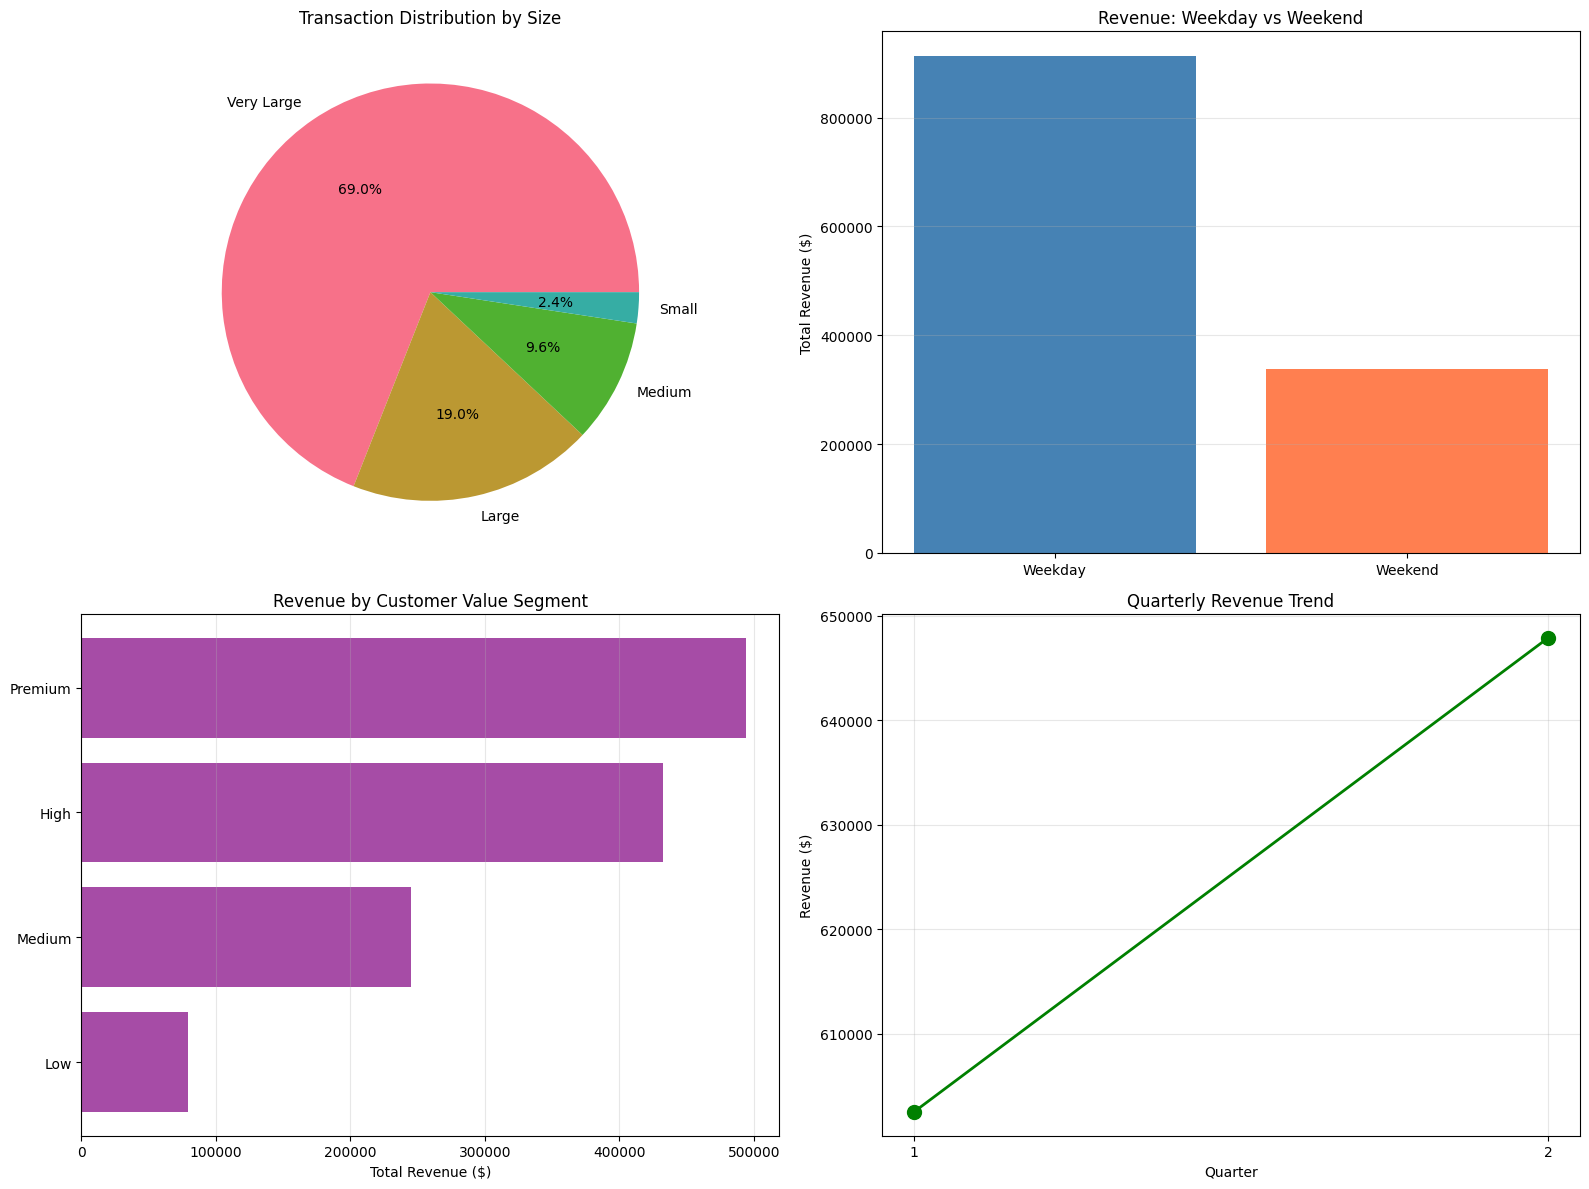

Comprehensive visualization complete!


In [15]:
# Comprehensive visualization of transformed data
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Transaction distribution by size
transaction_size_counts = transformed_data['transaction_size'].value_counts()
axes[0, 0].pie(transaction_size_counts, labels=transaction_size_counts.index, autopct='%1.1f%%')
axes[0, 0].set_title('Transaction Distribution by Size')

# 2. Weekend vs Weekday sales
weekend_sales = transformed_data.groupby('is_weekend')['total_amount'].sum()
axes[0, 1].bar(['Weekday', 'Weekend'], weekend_sales.values, color=['steelblue', 'coral'])
axes[0, 1].set_ylabel('Total Revenue ($)')
axes[0, 1].set_title('Revenue: Weekday vs Weekend')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Customer value segments
segment_revenue = transformed_data.groupby('customer_value_segment')['total_amount'].sum().sort_values()
axes[1, 0].barh(segment_revenue.index, segment_revenue.values, color='purple', alpha=0.7)
axes[1, 0].set_xlabel('Total Revenue ($)')
axes[1, 0].set_title('Revenue by Customer Value Segment')
axes[1, 0].grid(axis='x', alpha=0.3)

# 4. Quarterly trends
quarterly_revenue = transformed_data.groupby('quarter')['total_amount'].sum()
axes[1, 1].plot(quarterly_revenue.index, quarterly_revenue.values, marker='o', linewidth=2, markersize=10, color='green')
axes[1, 1].set_xlabel('Quarter')
axes[1, 1].set_ylabel('Revenue ($)')
axes[1, 1].set_title('Quarterly Revenue Trend')
axes[1, 1].set_xticks(quarterly_revenue.index)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Comprehensive visualization complete!")

## Key Takeaways

After completing this lesson, you should now understand:

1. **Fundamental Transformations**
   - Filtering data using boolean indexing and conditions
   - Mapping functions to transform values
   - Aggregating data with groupby operations
   - Joining datasets from multiple sources

2. **Advanced Techniques**
   - Handling missing data with appropriate strategies
   - Converting and optimizing data types
   - Performing window functions and rolling calculations
   - Pivoting and reshaping data for different analyses

3. **Best Practices**
   - Always validate data after transformations
   - Consider memory efficiency when working with large datasets
   - Use vectorized operations instead of loops for performance
   - Document your transformation logic for reproducibility
   - Handle edge cases (missing data, outliers, invalid values)

4. **Algorithmic Considerations**
   - Understand the time complexity of different operations
   - Choose appropriate join strategies based on data size
   - Optimize aggregations by selecting the right grouping columns
   - Use categorical types for memory-efficient string storage

5. **Real-World Applications**
   - Building ETL pipelines for data warehousing
   - Feature engineering for machine learning
   - Data quality improvement and standardization
   - Creating analytical datasets from raw sources

## Hands-On Exercise

**Challenge**: Build a transformation pipeline for e-commerce data

Using the techniques learned, perform the following transformations:

1. **Data Cleaning**
   - Handle missing values in region and payment_method
   - Standardize product names (remove extra spaces, convert to title case)

2. **Feature Engineering**
   - Calculate profit margin (assume cost is 60% of unit price)
   - Create a "high_value_customer" flag for customers with total revenue > $5000
   - Extract day of week and create "is_weekend" indicator

3. **Aggregations**
   - Calculate total revenue by product and region
   - Find the top 5 customers by total spend
   - Compute average transaction value by payment method

4. **Time-Based Analysis**
   - Calculate month-over-month growth rate
   - Create a 30-day moving average of daily revenue

5. **Reporting**
   - Create a summary table with key metrics
   - Visualize the results with appropriate charts

Try implementing this pipeline on your own before looking at the solution!

In [16]:
# Exercise Solution
def comprehensive_transformation_pipeline(df):
    '''
    Complete transformation pipeline for the exercise
    '''
    df_transformed = df.copy()

    # 1. Data Cleaning
    df_transformed['region'] = df_transformed['region'].fillna(df_transformed['region'].mode()[0])
    df_transformed['payment_method'] = df_transformed['payment_method'].fillna('Unknown')
    df_transformed['product'] = df_transformed['product'].astype(str).str.strip().str.title()

    # 2. Feature Engineering
    df_transformed['total_amount'] = df_transformed['quantity'] * df_transformed['unit_price']
    df_transformed['cost'] = df_transformed['unit_price'] * 0.6
    df_transformed['profit'] = df_transformed['total_amount'] - (df_transformed['cost'] * df_transformed['quantity'])
    df_transformed['profit_margin'] = (df_transformed['profit'] / df_transformed['total_amount'] * 100).round(2)

    df_transformed['day_of_week'] = df_transformed['date'].dt.dayofweek
    df_transformed['is_weekend'] = df_transformed['day_of_week'].isin([5, 6])

    # Calculate customer totals
    customer_totals = df_transformed.groupby('customer_id')['total_amount'].sum()
    df_transformed['high_value_customer'] = df_transformed['customer_id'].map(
        lambda x: customer_totals.get(x, 0) > 5000
    )

    # 3. Aggregations
    product_region_revenue = df_transformed.groupby(['product', 'region'])['total_amount'].sum().round(2)
    top_customers = df_transformed.groupby('customer_id')['total_amount'].sum().nlargest(5)
    payment_avg = df_transformed.groupby('payment_method')['total_amount'].mean().round(2)

    print("Product-Region Revenue (Top 10):")
    print(product_region_revenue.nlargest(10))
    print("\nTop 5 Customers:")
    print(top_customers)
    print("\nAverage Transaction by Payment Method:")
    print(payment_avg)

    return df_transformed

# Apply the comprehensive pipeline
final_transformed = comprehensive_transformation_pipeline(sales_data)

print("\n" + "="*50)
print("TRANSFORMATION PIPELINE COMPLETE")
print("="*50)
print(f"Original columns: {len(sales_data.columns)}")
print(f"Transformed columns: {len(final_transformed.columns)}")
print(f"\nNew features added: {list(set(final_transformed.columns) - set(sales_data.columns))}")

# Display sample of transformed data
print("\nSample of transformed data:")
print(final_transformed[['product', 'total_amount', 'profit', 'profit_margin',
                         'is_weekend', 'high_value_customer']].head(10))

Product-Region Revenue (Top 10):
product     region
Laptop      South     92087.53
Headphones  West      83758.16
Laptop      West      79262.65
Headphones  East      78854.28
Mouse       West      69050.44
            South     68012.60
Headphones  South     67594.98
Keyboard    North     67071.99
Monitor     West      66191.67
Laptop      North     65835.24
Name: total_amount, dtype: float64

Top 5 Customers:
customer_id
1435    13029.53
1462    12713.24
1466    12258.01
1434    11812.90
1916    11459.26
Name: total_amount, dtype: float64

Average Transaction by Payment Method:
payment_method
Cash           2569.02
Credit Card    2543.80
Debit Card     2577.58
PayPal         2345.10
Unknown        2141.54
Name: total_amount, dtype: float64

TRANSFORMATION PIPELINE COMPLETE
Original columns: 22
Transformed columns: 27

New features added: ['is_weekend', 'profit_margin', 'profit', 'cost', 'high_value_customer']

Sample of transformed data:
      product  total_amount    profit  profit_

## Further Resources

### Documentation
1. **Pandas Documentation**: https://pandas.pydata.org/docs/
   - User guide on data transformation and reshaping
   - API reference for all transformation functions

2. **NumPy Documentation**: https://numpy.org/doc/
   - Array operations and mathematical transformations
   - Vectorized computing for performance

3. **Python Data Science Handbook**: https://jakevdp.github.io/PythonDataScienceHandbook/
   - Chapter 3: Data Manipulation with Pandas

### ETL and Data Engineering
4. **Kimball Group - ETL Best Practices**: https://www.kimballgroup.com/
   - Industry-standard approaches to data transformation
   - Dimensional modeling and data warehouse design

5. **DataCamp - ETL in Python**: https://www.datacamp.com/
   - Interactive courses on data transformation
   - Real-world ETL pipeline examples

### Advanced Topics
6. **Dask for Large-Scale Data**: https://dask.org/
   - Parallel computing for datasets larger than memory
   - Scaling pandas transformations

7. **Apache Spark Documentation**: https://spark.apache.org/docs/latest/api/python/
   - Distributed data transformation for big data
   - PySpark DataFrames and SQL

8. **Great Expectations**: https://greatexpectations.io/
   - Data validation and quality testing
   - Ensuring transformation correctness

### Practice Datasets
9. **Kaggle Datasets**: https://www.kaggle.com/datasets
   - Real-world datasets for practice
   - Competitions to test your skills

10. **UCI Machine Learning Repository**: https://archive.ics.uci.edu/ml/
    - Classic datasets for learning and benchmarking
    - Variety of domains and data types